# Regression with Deep Neural Network (DNN)


In a regression problem, the aim is to predict the output of a continuous value, like a energy consumption, a temperature value or a probability.

This file demonstrates how to build models to predict the energy efficiency of the MAU system. To do this, you will provide the models with a description of many MAUs from that a certain period. This description includes attributes like temperature, humidity, airflow, and enthalpy.

In [3]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

C:\Users\nick8\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nick8\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\nick8\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


## Load all MAU entrance data (33 counts)

In [65]:
# Load entrance data
data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
5,6,6,73.760,31.29,6.52,37.49,5.53
6,7,7,74.910,29.89,6.46,38.03,5.48
7,8,8,90.120,1.17,0.37,33.39,0.33
8,9,9,75.540,29.08,6.44,38.33,5.46
9,10,1,80.780,22.35,5.81,40.09,4.98


## Load selected MAU entrance data (18 counts)

Avoid the outliers that are outside the specified range, so keep the data that is within the range to do the modeling later.

In [7]:
data_entrance = data_entrance.iloc[[0, 1, 2, 3, 4, 8, 9, 11, 17, 19, 20, 21, 24, 28, 29, 30, 31, 32]]
data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
8,9,9,75.540,29.08,6.44,38.33,5.46
9,10,1,80.780,22.35,5.81,40.09,4.98
11,12,1,87.760,12.46,3.97,40.32,3.46
17,18,1,85.660,14.32,4.39,39.87,3.72
19,20,3,89.650,13.09,4.42,42.21,3.86


## Load all MAU exit data (33 counts)

In [8]:
# Load exit data
data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
5,6,6,75.218,37.82,8.26,42.16,7.03
6,7,7,75.218,37.63,8.22,42.05,7.00
7,8,8,75.160,37.64,8.21,42.00,6.99
8,9,9,75.110,38.80,8.45,42.50,7.19
9,10,1,74.876,38.19,8.26,41.93,7.03


## Load selected MAU exit data (18 counts)

In [9]:
data_exit = data_exit[data_exit['Temperature (°F)'].between(68, 75.2, inclusive=False) & data_exit['Humidity (%)'].between(38, 48, inclusive=False)]
data_exit

C:\Users\nick8\AppData\Local\Temp\ipykernel_9608\3176555999.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_exit = data_exit[data_exit['Temperature (°F)'].between(68, 75.2, inclusive=False) & data_exit['Humidity (%)'].between(38, 48, inclusive=False)]


,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
8,9,9,75.110,38.80,8.45,42.50,7.19
9,10,1,74.876,38.19,8.26,41.93,7.03
11,12,1,74.804,38.61,8.32,42.04,7.08
17,18,1,74.894,38.55,8.83,42.11,7.59
19,20,3,75.074,39.34,8.56,42.73,7.28


## Clean the data

The command dataset.isna().sum() is used to identify and sum up all the missing values (NA or NaN) in a dataset across each column. This is particularly useful in data preprocessing to understand which columns have missing data and how much, helping in making decisions about data cleaning and imputation strategies.

In [10]:
data_entrance.isna().sum()
data_exit.isna().sum()

Count                   0
Which MAU               0
Temperature (°F)        0
Humidity (%)            0
 Density (g/m^3)        0
 Enthalpy, h (kJ/kg)    0
 x (g/kg)               1
dtype: int64

Drop those rows to keep this initial tutorial simple. The command dataset = dataset.dropna() is used to remove all rows in the dataset that contain missing values (NA or NaN). After this operation, the dataset will only contain rows where all data points are non-missing. This method is often used in data preprocessing to ensure that analyses or machine learning models are not affected by the lack of data in certain records.

In this case, the Count #25 is deleted due to the missing value.

After the data is cleaned, these are the remaining datasets to proceed the modeling.

## Datasets for the modeling

### MAU entrance (17 counts)

In [11]:
data_entrance = data_entrance.dropna()
data_exit = data_exit.dropna()
data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
8,9,9,75.540,29.08,6.44,38.33,5.46
9,10,1,80.780,22.35,5.81,40.09,4.98
11,12,1,87.760,12.46,3.97,40.32,3.46
17,18,1,85.660,14.32,4.39,39.87,3.72
19,20,3,89.650,13.09,4.42,42.21,3.86


### MAU exit (17 counts)

In [12]:
data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
8,9,9,75.110,38.80,8.45,42.50,7.19
9,10,1,74.876,38.19,8.26,41.93,7.03
11,12,1,74.804,38.61,8.32,42.04,7.08
17,18,1,74.894,38.55,8.83,42.11,7.59
19,20,3,75.074,39.34,8.56,42.73,7.28


## Data visualization

This file includes datasets that cover both MAU entrance and exit.

In [13]:
import matplotlib.pyplot as plt

dataset=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU.csv', encoding='unicode_escape')
dataset

,Count,Date,Which MAU,Entering Temperature (°C),Entering Temperature (°F),Entering Humidity (%),Entering Airflow (g/m^3),"Entering Enthalpy, h (kJ/kg)",Entering x (g/kg),Leaving Temperature (°C),Leaving Temperature (°F),Leaving Humidity (%),Leaving Airflow (g/m^3),"Leaving Enthalpy, h (kJ/kg)",Leaving x (g/kg)
0,1,22-Feb-24,1,23.33,73.990,31.99,6.73,38.08,5.68,23.91,75.038,38.79,8.40,42.38,7.17
1,2,22-Feb-24,2,30.78,87.400,20.51,6.51,45.55,5.66,23.88,74.984,38.16,8.28,42.05,7.04
2,3,22-Feb-24,3,31.34,88.410,20.05,6.59,46.29,5.74,23.94,75.092,39.94,8.68,42.99,7.40
3,4,22-Feb-24,4,30.76,87.370,20.35,6.45,45.39,5.60,23.90,75.020,39.08,8.48,42.52,2.22
4,5,22-Feb-24,5,30.74,87.330,20.63,6.51,45.59,5.66,23.91,75.038,38.89,8.45,42.45,7.19
5,6,22-Feb-24,6,23.20,73.760,31.29,6.52,37.49,5.53,24.01,75.218,37.82,8.26,42.16,7.03
6,7,22-Feb-24,7,23.84,74.910,29.89,6.46,38.03,5.48,24.01,75.218,37.63,8.22,42.05,7.00
7,8,22-Feb-24,8,32.29,90.120,1.17,0.37,33.39,0.33,23.98,75.160,37.64,8.21,42.00,6.99
8,9,22-Feb-24,9,24.19,75.540,29.08,6.44,38.33,5.46,23.95,75.110,38.80,8.45,42.50,7.19
9,10,29-Feb-24,1,27.10,80.780,22.35,5.81,40.09,4.98,23.82,74.876,38.19,8.26,41.93,7.03


In [14]:
dataset2 = dataset[dataset['Leaving Temperature (°F)'].between(68, 75.2, inclusive=False) & dataset['Leaving Humidity (%)'].between(38, 48, inclusive=False)]
dataset2 

C:\Users\nick8\AppData\Local\Temp\ipykernel_9608\2534633955.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dataset2 = dataset[dataset['Leaving Temperature (°F)'].between(68, 75.2, inclusive=False) & dataset['Leaving Humidity (%)'].between(38, 48, inclusive=False)]


,Count,Date,Which MAU,Entering Temperature (°C),Entering Temperature (°F),Entering Humidity (%),Entering Airflow (g/m^3),"Entering Enthalpy, h (kJ/kg)",Entering x (g/kg),Leaving Temperature (°C),Leaving Temperature (°F),Leaving Humidity (%),Leaving Airflow (g/m^3),"Leaving Enthalpy, h (kJ/kg)",Leaving x (g/kg)
0,1,22-Feb-24,1,23.33,73.990,31.99,6.73,38.08,5.68,23.91,75.038,38.79,8.40,42.38,7.17
1,2,22-Feb-24,2,30.78,87.400,20.51,6.51,45.55,5.66,23.88,74.984,38.16,8.28,42.05,7.04
2,3,22-Feb-24,3,31.34,88.410,20.05,6.59,46.29,5.74,23.94,75.092,39.94,8.68,42.99,7.40
3,4,22-Feb-24,4,30.76,87.370,20.35,6.45,45.39,5.60,23.90,75.020,39.08,8.48,42.52,2.22
4,5,22-Feb-24,5,30.74,87.330,20.63,6.51,45.59,5.66,23.91,75.038,38.89,8.45,42.45,7.19
8,9,22-Feb-24,9,24.19,75.540,29.08,6.44,38.33,5.46,23.95,75.110,38.80,8.45,42.50,7.19
9,10,29-Feb-24,1,27.10,80.780,22.35,5.81,40.09,4.98,23.82,74.876,38.19,8.26,41.93,7.03
11,12,3-Mar-24,1,30.98,87.760,12.46,3.97,40.32,3.46,23.78,74.804,38.61,8.32,42.04,7.08
17,18,6-Mar-24,1,29.81,85.660,14.32,4.39,39.87,3.72,23.83,74.894,38.55,8.83,42.11,7.59
19,20,6-Mar-24,3,32.03,89.650,13.09,4.42,42.21,3.86,23.93,75.074,39.34,8.56,42.73,7.28


### Data visualization including all datasets

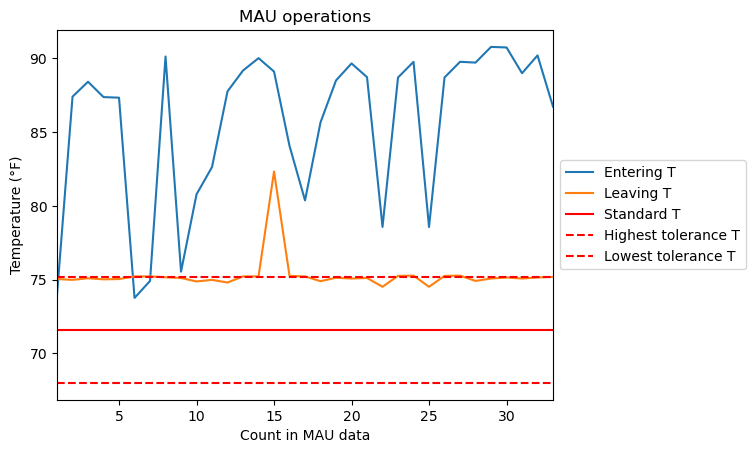

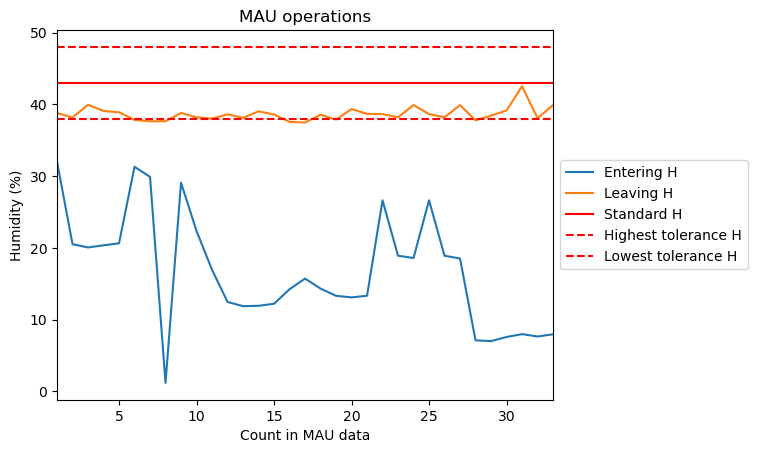

In [15]:
fig, ax = plt.subplots()

ax.plot(dataset['Count'],dataset['Entering Temperature (°F)'], label='Entering T')
ax.plot(dataset['Count'],dataset['Leaving Temperature (°F)'], label='Leaving T')

ax.axhline(y=71.6, color='r', linestyle='-', label='Standard T')
ax.axhline(y=75.2, color='r', linestyle='--', label='Highest tolerance T')
ax.axhline(y=68, color='r', linestyle='--', label='Lowest tolerance T')

ax.set_xlabel('Count in MAU data')
ax.set_ylabel('Temperature (°F)')
ax.set_title('MAU operations')

ax.set_xlim(dataset['Count'].min(), dataset['Count'].max())

#plt.figure(figsize=(10, 10))  # Width, Height

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

fig, ax = plt.subplots()

ax.plot(dataset['Count'],dataset['Entering Humidity (%)'], label='Entering H')
ax.plot(dataset['Count'],dataset['Leaving Humidity (%)'], label='Leaving H')

ax.axhline(y=43, color='r', linestyle='-', label='Standard H')
ax.axhline(y=48, color='r', linestyle='--', label='Highest tolerance H')
ax.axhline(y=38, color='r', linestyle='--', label='Lowest tolerance H')

ax.set_xlabel('Count in MAU data')
ax.set_ylabel('Humidity (%)')
ax.set_title('MAU operations')

ax.set_xlim(dataset['Count'].min(), dataset['Count'].max())

#plt.figure(figsize=(10, 10))  # Width, Height

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Data visualization including selected datasets

There are no outliers in this case.

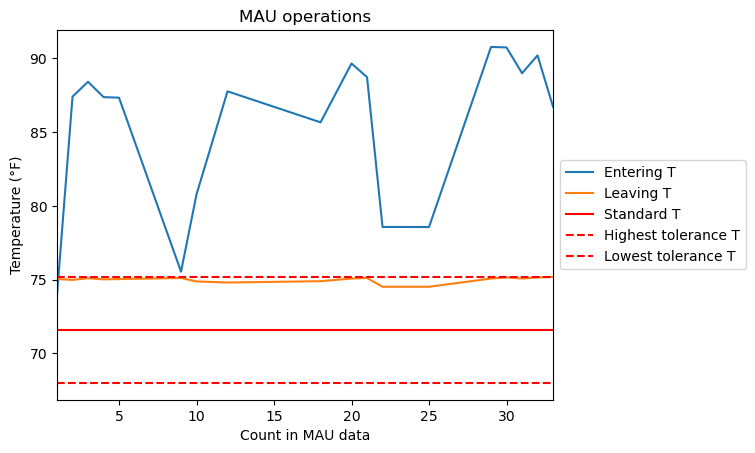

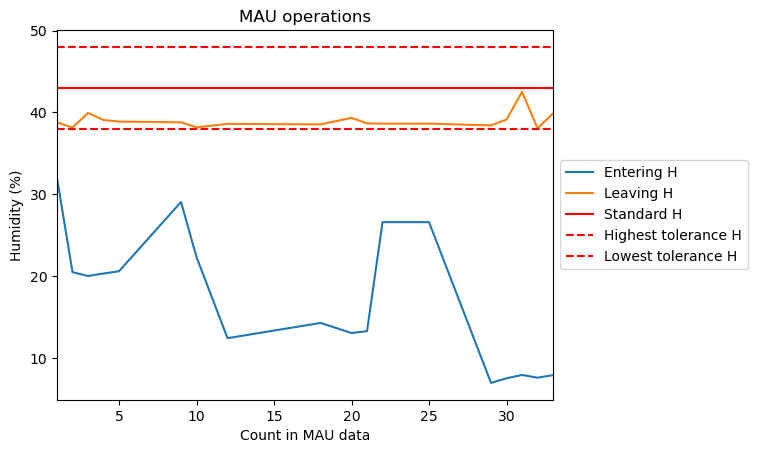

In [16]:
fig, ax = plt.subplots()

ax.plot(dataset2['Count'],dataset2['Entering Temperature (°F)'], label='Entering T')
ax.plot(dataset2['Count'],dataset2['Leaving Temperature (°F)'], label='Leaving T')

ax.axhline(y=71.6, color='r', linestyle='-', label='Standard T')
ax.axhline(y=75.2, color='r', linestyle='--', label='Highest tolerance T')
ax.axhline(y=68, color='r', linestyle='--', label='Lowest tolerance T')

ax.set_xlabel('Count in MAU data')
ax.set_ylabel('Temperature (°F)')
ax.set_title('MAU operations')

ax.set_xlim(dataset2['Count'].min(), dataset2['Count'].max())

#plt.figure(figsize=(10, 10))  # Width, Height

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

fig, ax = plt.subplots()

ax.plot(dataset2['Count'],dataset2['Entering Humidity (%)'], label='Entering H')
ax.plot(dataset2['Count'],dataset2['Leaving Humidity (%)'], label='Leaving H')

ax.axhline(y=43, color='r', linestyle='-', label='Standard H')
ax.axhline(y=48, color='r', linestyle='--', label='Highest tolerance H')
ax.axhline(y=38, color='r', linestyle='--', label='Lowest tolerance H')

ax.set_xlabel('Count in MAU data')
ax.set_ylabel('Humidity (%)')
ax.set_title('MAU operations')

ax.set_xlim(dataset2['Count'].min(), dataset2['Count'].max())

#plt.figure(figsize=(10, 10))  # Width, Height

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your model.

The line of code "train_dataset = dataset.sample(frac=0.8, random_state=0)" creates a training dataset by randomly selecting 80% of the rows from the dataset, ensuring that the selection is reproducible by setting a random state. The frac=0.8 parameter specifies that 80% of the data should be sampled, and random_state=0 ensures that the random selection of rows is consistent every time the code is run, facilitating reproducible results in experiments or analyses.

The line "test_dataset = dataset.drop(train_dataset.index)" removes all rows from dataset that are already included in train_dataset, effectively creating a test dataset. This is achieved by dropping rows indexed in train_dataset.index from the original dataset. The result is a dataset containing 20% of the original data, not selected for training, used for testing model performance.

### Train datasets for MAU entrance (14 counts)

Drop 'Count' and 'Which MAU' columns.

In [17]:
data_entrance = data_entrance.drop(['Count','Which MAU'], axis=1)
train_dataset_entrance = data_entrance.sample(frac=0.8, random_state=0)
test_dataset_entrance = data_entrance.drop(train_dataset_entrance.index)
train_dataset_entrance

# Spliting data into Feature 
#X=data[['Humidity (%)','Airflow (g/m^3)','Enthalpy, h (kJ/kg)','x (g/kg)']]
#y=data['Temperature (°F)']

# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test (validation) set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
1,87.400,20.51,6.51,45.55,5.66
9,80.780,22.35,5.81,40.09,4.98
17,85.660,14.32,4.39,39.87,3.72
19,89.650,13.09,4.42,42.21,3.86
29,90.734,7.57,2.63,38.76,2.31
4,87.330,20.63,6.51,45.59,5.66
2,88.410,20.05,6.59,46.29,5.74
30,88.988,7.97,2.71,38.04,2.30
20,88.720,13.32,4.37,41.51,3.81
11,87.760,12.46,3.97,40.32,3.46


### Test datasets for MAU entrance (3 counts)

In [18]:
test_dataset_entrance

,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
8,75.540,29.08,6.44,38.33,5.46
28,90.770,7.00,2.42,38.36,2.10
31,90.194,7.64,2.76,38.77,2.32


### Train datasets for MAU exit (14 counts)

In [19]:
data_exit = data_exit.drop(['Count','Which MAU'], axis=1)
train_dataset_exit = data_exit.sample(frac=0.8, random_state=0)
test_dataset_exit = data_exit.drop(train_dataset_exit.index)
train_dataset_exit

,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
1,74.984,38.16,8.28,42.05,7.04
9,74.876,38.19,8.26,41.93,7.03
17,74.894,38.55,8.83,42.11,7.59
19,75.074,39.34,8.56,42.73,7.28
29,75.146,39.14,8.52,42.67,7.26
4,75.038,38.89,8.45,42.45,7.19
2,75.092,39.94,8.68,42.99,7.40
30,75.074,42.52,8.47,42.52,7.21
20,75.110,38.67,8.43,42.48,7.17
11,74.804,38.61,8.32,42.04,7.08


### Test datasets for MAU exit (3 counts)

In [20]:
test_dataset_exit

,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
8,75.110,38.80,8.45,42.50,7.19
28,75.074,38.43,8.36,42.28,7.11
31,75.146,38.07,8.30,42.19,7.06


## Statistics

Let's check the overall statistics. Note how each feature covers a very different range.

.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. By default, it provides information such as count (number of non-missing values), mean, standard deviation (std), minimum, 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum for numeric columns.

.transpose() or .T: This method transposes the DataFrame, swapping its rows and columns. After calling .describe(), the resulting DataFrame has the descriptive statistics as rows and the features (or columns of the original dataset) as columns. Transposing flips this layout, so the features become rows and the descriptive statistics become columns. This often makes the output more readable and easier to analyze, especially if the dataset has many features.

### Train datasets for MAU entrance

In [19]:
train_dataset_entrance.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Temperature (°F),14.0,85.863000,4.752618,73.99,85.9250,87.385,88.6425,90.734
Humidity (%),14.0,17.084286,7.342093,7.57,12.6175,17.185,20.6000,31.990
Density (g/m^3),14.0,4.997857,1.628927,2.44,4.0700,5.115,6.4950,6.730
"Enthalpy, h (kJ/kg)",14.0,41.289286,3.265377,36.15,39.0375,40.260,44.5950,46.290
x (g/kg),14.0,4.198571,1.360152,2.12,3.5250,3.870,5.6450,5.740


### Train datasets for MAU exit

In [20]:
train_dataset_exit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (°F),14.0,74.989143,0.172567,74.516,74.9165,75.038,75.0875,75.182
Humidity (%),14.0,39.172143,1.102579,38.160,38.6175,38.840,39.2900,42.520
Density (g/m^3),14.0,8.475000,0.172437,8.260,8.3400,8.460,8.5500,8.830
"Enthalpy, h (kJ/kg)",14.0,42.408571,0.393189,41.760,42.0650,42.465,42.6325,43.090
x (g/kg),14.0,6.869286,1.347153,2.220,7.0900,7.180,7.2750,7.590


## Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

train_features = train_dataset.copy(): This line creates a copy of the train_dataset DataFrame and assigns it to train_features. The .copy() method ensures that the original dataset remains unchanged when modifications are made to train_features. This dataset contains the features used to train the machine learning model.

test_features = test_dataset.copy(): Similarly, this line duplicates the test_dataset DataFrame, storing the copy in test_features. This is done to preserve the original test_dataset while allowing modifications on test_features. This dataset is used to evaluate the model's performance after training.

train_labels = train_features.pop('Temperature (°F)'): The .pop() method removes the column named 'Temperature (°F)' from train_features and returns it. This removed column is then stored in train_labels. In our machine learning context, 'Temperature (°F)' is considered the target variable (or label) that the model will be trained to predict. By doing this, train_features now only contains the input features (or independent variables) for the training data, while train_labels holds the corresponding target values.

test_labels = test_features.pop('Temperature (°F)'): This line does the same operation as the previous one but for the testing dataset. It removes the 'Temperature (°F)' column from test_features and stores it in test_labels. Now, test_features only includes the input features for the testing data, and test_labels contains the corresponding target values that will be used to evaluate the model's predictive accuracy.

### Train and test features, and train and test labels for MAU entrance

In [23]:
train_features_entrance = train_dataset_entrance.copy()
test_features_entrance = test_dataset_entrance.copy()
train_labels_entrance = train_features_entrance.pop('Temperature (°F)')
test_labels_entrance = test_features_entrance.pop('Temperature (°F)')

In [24]:
train_features_entrance

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
1,20.51,6.51,45.55,5.66
9,22.35,5.81,40.09,4.98
17,14.32,4.39,39.87,3.72
19,13.09,4.42,42.21,3.86
29,7.57,2.63,38.76,2.31
4,20.63,6.51,45.59,5.66
2,20.05,6.59,46.29,5.74
30,7.97,2.71,38.04,2.30
20,13.32,4.37,41.51,3.81
11,12.46,3.97,40.32,3.46


In [25]:
test_features_entrance

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
8,29.08,6.44,38.33,5.46
28,7.00,2.42,38.36,2.10
31,7.64,2.76,38.77,2.32


In [26]:
train_labels_entrance

1     87.400
9     80.780
17    85.660
19    89.650
29    90.734
4     87.330
2     88.410
30    88.988
20    88.720
11    87.760
32    86.720
21    78.570
3     87.370
0     73.990
Name: Temperature (°F), dtype: float64

In [27]:
test_labels_entrance

8     75.540
28    90.770
31    90.194
Name: Temperature (°F), dtype: float64

### Train and test features, and train and test labels for MAU exit

In [28]:
train_features_exit = train_dataset_exit.copy()
test_features_exit = test_dataset_exit.copy()
train_labels_exit = train_features_exit.pop('Temperature (°F)')
test_labels_exit = test_features_exit.pop('Temperature (°F)')

In [29]:
train_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
1,38.16,8.28,42.05,7.04
9,38.19,8.26,41.93,7.03
17,38.55,8.83,42.11,7.59
19,39.34,8.56,42.73,7.28
29,39.14,8.52,42.67,7.26
4,38.89,8.45,42.45,7.19
2,39.94,8.68,42.99,7.40
30,42.52,8.47,42.52,7.21
20,38.67,8.43,42.48,7.17
11,38.61,8.32,42.04,7.08


In [30]:
test_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
8,38.80,8.45,42.50,7.19
28,38.43,8.36,42.28,7.11
31,38.07,8.30,42.19,7.06


In [31]:
train_labels_exit

1     74.984
9     74.876
17    74.894
19    75.074
29    75.146
4     75.038
2     75.092
30    75.074
20    75.110
11    74.804
32    75.182
21    74.516
3     75.020
0     75.038
Name: Temperature (°F), dtype: float64

In [32]:
test_labels_exit

8     75.110
28    75.074
31    75.146
Name: Temperature (°F), dtype: float64

## Regression with a deep neural network (DNN)

Here, you will implement a multiple-input DNN model.

The name "hidden" here just means not directly connected to the inputs or outputs.

This model will contain a few layers.

* The dense input layer.
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

The `compile` method is included in the `build_and_compile_model` function below.

In [33]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4,  kernel_initializer='normal', input_dim = train_features_entrance.shape[1], activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [34]:
# Experiment with different configurations
#configs = [
 #   {"layers": 2, "neurons_per_layer": [32, 16]},
 #   {"layers": 3, "neurons_per_layer": [64, 32, 16]},
 #   {"layers": 4, "neurons_per_layer": [128, 64, 32, 16]},
 #   {"layers": 2, "neurons_per_layer": [64, 64]},
 #   {"layers": 3, "neurons_per_layer": [128, 64, 32]}]

### Regression using a DNN and multiple inputs

In [35]:
dnn_model = build_and_compile_model()
dnn_model.summary()
dnn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable params: 0
_________________________________________________________________


This table summarizes the architecture of the neural network model. The table is divided into several columns detailing the layers in the model, their types, output shapes, and the number of parameters (weights and biases) each layer has. Here's a breakdown of the table:

Layer: Indicates the name and type of each layer in the model. The model consists of a normalization layer followed by three dense (fully connected) layers.

Output Shape: The shape of the output for each layer. The notation (None, x) indicates that the batch size is variable (denoted by None), and x is the dimensionality of the output from that layer.

The normalization layer takes an input with 9 features ((None, 9)).
The first dense layer outputs 64 units ((None, 64)).
The second dense layer, identical to the first, also outputs 64 units.
The final dense layer outputs a single unit ((None, 1)), corresponding to the model's prediction.

Param #: Lists the number of parameters in each layer, which are learned during the training process.

The normalization layer has 19 parameters, which are not trainable. These parameters might include statistics like mean and variance for each input feature used for data normalization.
The first dense layer has 640 parameters, calculated as (9 input features * 64 output units) + 64 bias terms.
The second dense layer has 4160 parameters, derived from (64 input units * 64 output units) + 64 bias terms.
The final dense layer has 65 parameters, from (64 input units * 1 output unit) + 1 bias term.

Total params: The total number of parameters in the model, summing to 4,884. This includes both trainable and non-trainable parameters.

Trainable params: The number of parameters that will be updated during training, totaling 4,865. This excludes the normalization layer's statistics.

Non-trainable params: Parameters that do not get updated during the training process, in this case, 19, likely related to the normalization layer.


Train the model with Keras `Model.fit`.

The validation_split=0.2 argument in the fit method of the Keras API indicates that 20% of the training data should be set aside for validation. The model will train on 80% of the data and evaluate its performance on the remaining 20% to monitor for issues like overfitting. This validation set is not used to update the model's weights; it's only for evaluation purposes to give an estimate of the model's performance on unseen data.

The verbose parameter controls how much information the training process outputs to the console. Setting verbose=0 means that you won’t see any logging output during training, which can be useful if you don't need to track the training process in detail and want to avoid cluttering your console.

In [36]:
%%time
history_entrance = dnn_model.fit(
    train_features_entrance,
    train_labels_entrance,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 9.29 s


In [37]:
%%time
history_exit = dnn_model.fit(
    train_features_exit,
    train_labels_exit,
    validation_split=0.2,
    verbose=0, epochs=100) 

Wall time: 6.63 s


### Visualize the model's training progress in DNN model

Visualize the model's training progress using the stats stored in the `history` object:

In [38]:
def plot_loss(history_entrance):
  plt.plot(history_entrance.history['loss'], label='Training loss')
  plt.plot(history_entrance.history['val_loss'], label='Validation loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU entrance')
  plt.legend()
  plt.grid(True)

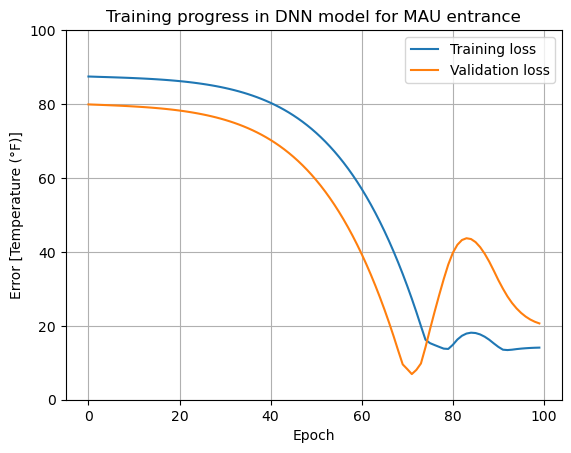

In [39]:
plot_loss(history_entrance)

In [62]:
def plot_loss(history_exit):
  plt.plot(history_exit.history['loss'], label='Training loss')
  plt.plot(history_exit.history['val_loss'], label='Validation loss')
  plt.ylim([0, 60])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU exit')
  plt.legend()
  plt.grid(True)

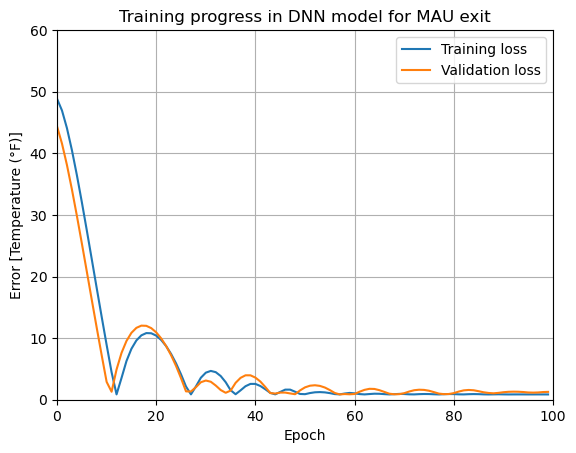

In [63]:

plot_loss(history_exit)

### Collect the results on the test set

#### MAU entrance

In [42]:
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
test_features_entrance

array([[29.08,  6.44, 38.33,  5.46],
       [ 7.  ,  2.42, 38.36,  2.1 ],
       [ 7.64,  2.76, 38.77,  2.32]], dtype=float32)

In [43]:
test_results_entrance = {}
test_results_entrance['dnn_model'] = dnn_model.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
test_results_entrance

{'dnn_model': 37.910552978515625}

#### MAU exit

In [44]:
test_features_exit = np.asarray(test_features_exit).astype(np.float32)
test_features_exit

array([[38.8 ,  8.45, 42.5 ,  7.19],
       [38.43,  8.36, 42.28,  7.11],
       [38.07,  8.3 , 42.19,  7.06]], dtype=float32)

In [45]:
test_results_exit = {}
test_results_exit['dnn_model'] = dnn_model.evaluate(test_features_exit, test_labels_exit, verbose=0)
test_results_exit

{'dnn_model': 0.8087208867073059}

## Performance

In [46]:
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,37.910553


In [47]:
pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.808721


### Make predictions

In [48]:
test_predictions_entrance = dnn_model.predict(test_features_entrance).flatten()
test_predictions_entrance

1/1 [==============================] - 0s 199ms/step


array([61.764, 39.92 , 41.088], dtype=float32)

In [49]:
test_predictions_exit = dnn_model.predict(test_features_exit).flatten()
test_predictions_exit

1/1 [==============================] - 0s 25ms/step


array([74.814, 74.254, 73.837], dtype=float32)

In [50]:
error_entrance = test_predictions_entrance - test_labels_entrance
error_entrance

8    -13.776141
28   -50.849704
31   -49.105816
Name: Temperature (°F), dtype: float64

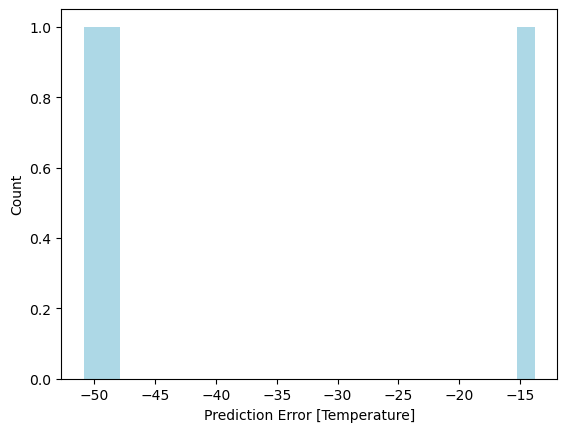

In [71]:
plt.hist(error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

In [52]:
error_exit = test_predictions_exit - test_labels_exit
error_exit


8    -0.296287
28   -0.820498
31   -1.309376
Name: Temperature (°F), dtype: float64

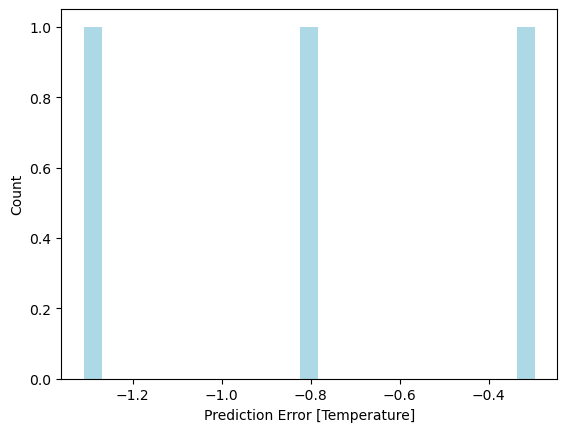

In [70]:
plt.hist(error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

#### Average error (AE)

AE: Provide a measure of bias

In [72]:
average_error_entrance = np.mean(error_entrance)
print("Average error:", average_error_entrance)

Average error: -37.9105537109375


In [55]:
average_error_exit = np.mean(error_exit)
print("Average error:", average_error_exit)

Average error: -0.8087202962239578


#### Mean squared error (MSE) and mean absolute error (MAE)

MSE: Penalize significant errors more heavily \
MAE: Provide a measure of the average magnitude of errors

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_entrance, test_predictions_entrance)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1728.9518741095023
Mean Absolute Error: 37.9105537109375


In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_exit, test_predictions_exit)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.8251560720298459
Mean Absolute Error: 0.8087202962239578


In [73]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 42.90%


In [74]:
mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 1.08%
